### Import Quasar catalog for DR16

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL="https://data.sdss.org/sas/dr16/eboss/qso/DR16Q/"
file="DR16Q_v4.fits"
local_dir="/home/hquintero/eboss/"
local_file = os.path.join(local_dir,file)


if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
       
catalog=Table.read('DR16Q_v4.fits')

#catalog.colnames
len(catalog)

/home/hquintero/eboss/DR16Q_v4.fits already exist


750414

### Filtering the data from FITS (name code,redshift, RA&DEC,MJD,BAL index) and sorting by plate

In [24]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0)

reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:750415]
small_cat
len(reduced_cat)

169837

### Lets plot the distribution in RA/DEC of the full catalog, and the small catalog

Text(0, 0.5, 'DEC')

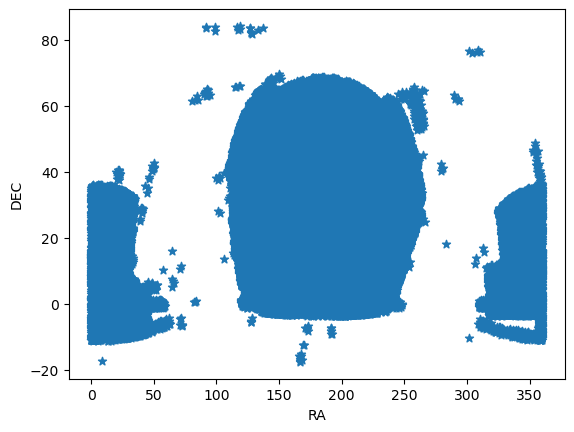

In [25]:
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='*')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

### Making a loop to check data names

In [5]:
A = np.unique(small_cat['PLATE'])
X = A<1000
H = A[X]

In [28]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    
    if (p<1000):
        if (q>=1000):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
        elif ((q>=100) and (q<1000)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
        elif ((q>=10) and (q<100)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
        elif ((q>=0) and (q<10)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
    elif(p>=1000):
        if (q>=1000):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
        elif ((q>=100) and (q<1000)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
        elif ((q>=10) and (q<100)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
        elif ((q>=0) and (q<10)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
            
#plate_list=np.unique(plate_list)
#plate_list.insert(0,'id')
#plate_list.sort()
np.savetxt('/home/hquintero/spc_fulldr16/DR16spclist_fd.txt',plate_list, fmt='%s', delimiter=',') # fd = For download
print(len(plate_list))
plate_list.insert(0,'id')
np.savetxt('/home/hquintero/spc_fulldr16/DR16spclist_fc.txt',plate_list, fmt='%s', delimiter=',') # fc = For check
print(len(plate_list))


169837
169838


## Making list just for BAL Quasars

In [29]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']>0)

reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:750415]
small_cat
len(reduced_cat)

11093

Text(0, 0.5, 'DEC')

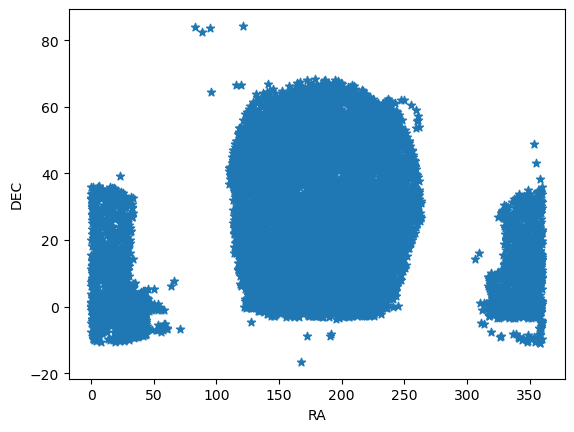

In [30]:
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='*')
#plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

In [32]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    
    if (p<1000):
        if (q>=1000):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
        elif ((q>=100) and (q<1000)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
        elif ((q>=10) and (q<100)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
        elif ((q>=0) and (q<10)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
    elif(p>=1000):
        if (q>=1000):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
        elif ((q>=100) and (q<1000)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
        elif ((q>=10) and (q<100)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
        elif ((q>=0) and (q<10)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
            
#plate_list=np.unique(plate_list)
#plate_list.insert(0,'id')
#plate_list.sort()
np.savetxt('/home/hquintero/spc_fulldr16/balDR16spclist_fd.txt',plate_list, fmt='%s', delimiter=',') # fd = For download
print(len(plate_list))

11093


In [33]:
w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC'])\
 & (catalog['RA']>0) & (catalog['MJD']< 56870)

reduced_cat=catalog[w]
reduced_cat
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:750415]
small_cat
len(reduced_cat)

180930

In [34]:
plate_list=[]
for x in range(len(small_cat)):
    p = small_cat['PLATE'][x]
    m = small_cat['MJD'][x]
    q = small_cat['FIBERID'][x]
    
    if (p<1000):
        if (q>=1000):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
        elif ((q>=100) and (q<1000)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
        elif ((q>=10) and (q<100)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
        elif ((q>=0) and (q<10)):
            plate_list.append('0'+str(p)+'/spec-0'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
    elif(p>=1000):
        if (q>=1000):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-'+str(q)+'.fits')
        elif ((q>=100) and (q<1000)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-0'+str(q)+'.fits')
        elif ((q>=10) and (q<100)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-00'+str(q)+'.fits')
        elif ((q>=0) and (q<10)):
            plate_list.append(str(p)+'/spec-'+str(p)+'-'+str(m)+'-000'+str(q)+'.fits')
            
plate_list.insert(0,'id')
np.savetxt('/home/hquintero/spc_fulldr16/balDR16spclist_fc.txt',plate_list, fmt='%s', delimiter=',') # fc = For check
print(len(plate_list))

180931
